In [1]:
import sys
sys.path.append('../../build')

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import simpl

In [22]:
# read hyperedges
# dataset from https://www.cs.cornell.edu/~arb/data/contact-high-school-labeled/
edges = []
with open("./hyperedges-contact-high-school.txt", 'r') as file:
    for line in file:
        edge = list(map(int, line[:-1].split(',')))
        edge.sort()
        edges.append(edge)

In [23]:
labels = []
with open("./node-labels-contact-high-school.txt", 'r') as file:
    for line in file:
        labels.append(int(line))

In [24]:
labeled_edges = list(map(lambda row: list(map(lambda x: labels[x-1], row)), edges))

In [25]:
D = 5 # max dimension

In [31]:
x = np.arange(start=1, stop=101)

Hypergraph

In [26]:
H = simpl.HyperGraph()
for edge in edges:
  H.AddEdge(edge)

In [27]:
for i in range(D+1):
  print(i, H.BettiNumber(i))
  

0 0
1 7491
2 0
3 0
4 0
5 0


In [28]:
h_clos = H.ClosenessAll(0, 1, False)
h_clos = sorted(h_clos, key=lambda x: x[1], reverse=True)

In [29]:
h_betw = H.BetweennessAll(0, 1, False)
h_betw = sorted(h_betw, key=lambda x: x[1], reverse=True)

In [30]:
h_eigs = H.EigenValues(1, 0, 2, False, 100)

In [35]:
def getValues(a):
  return list(map(lambda x: x[1], a))

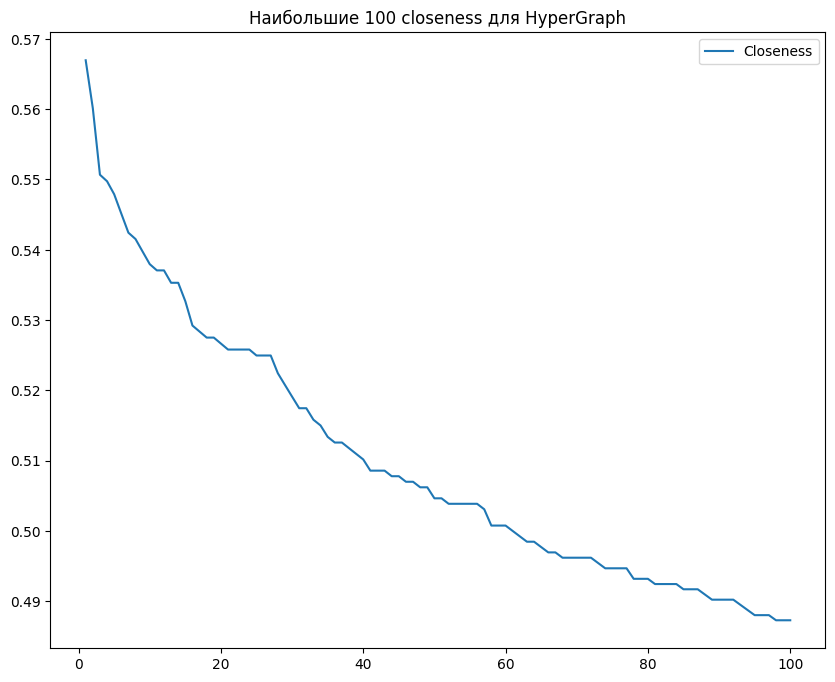

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(h_clos)[:100], label ='Closeness')

plt.legend()
plt.title('Наибольшие 100 closeness для HyperGraph')

plt.show()


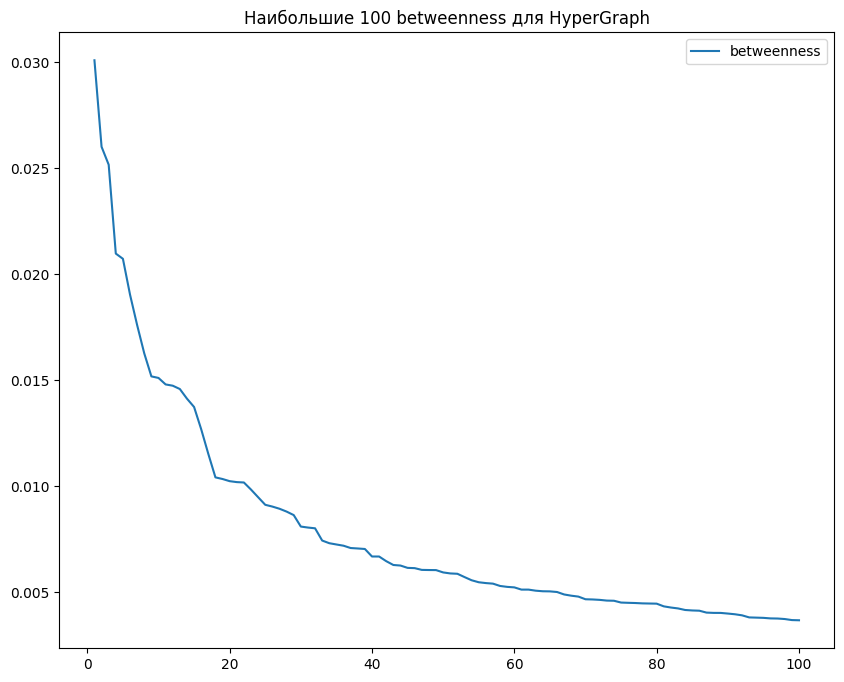

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(h_betw)[:100], label ='betweenness')

plt.legend()
plt.title('Наибольшие 100 betweenness для HyperGraph')

plt.show()


Graph

In [43]:
G = simpl.Graph()
for edge in edges:
  for v in edge:
    for u in edge:
      if v != u:
        G.AddEdge(v, u)

In [44]:
for i in range(D+1):
  print(i, G.BettiNumber(i))
  

0 1
1 5492
2 0
3 0
4 0
5 0


In [45]:
g_betw = G.BetweennessAll(0, 1, False)
g_betw = sorted(g_betw, key=lambda x: x[1], reverse=True)

In [46]:
g_clos = G.ClosenessAll(0, 1, False)
g_clos = sorted(g_clos, key=lambda x: x[1], reverse=True)

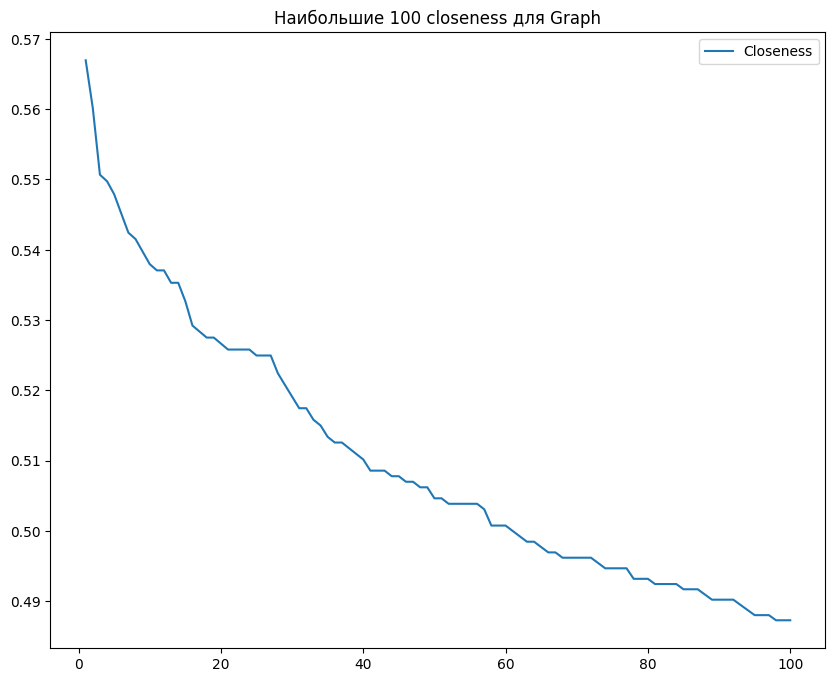

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(g_clos)[:100], label ='Closeness')

plt.legend()
plt.title('Наибольшие 100 closeness для Graph')

plt.show()


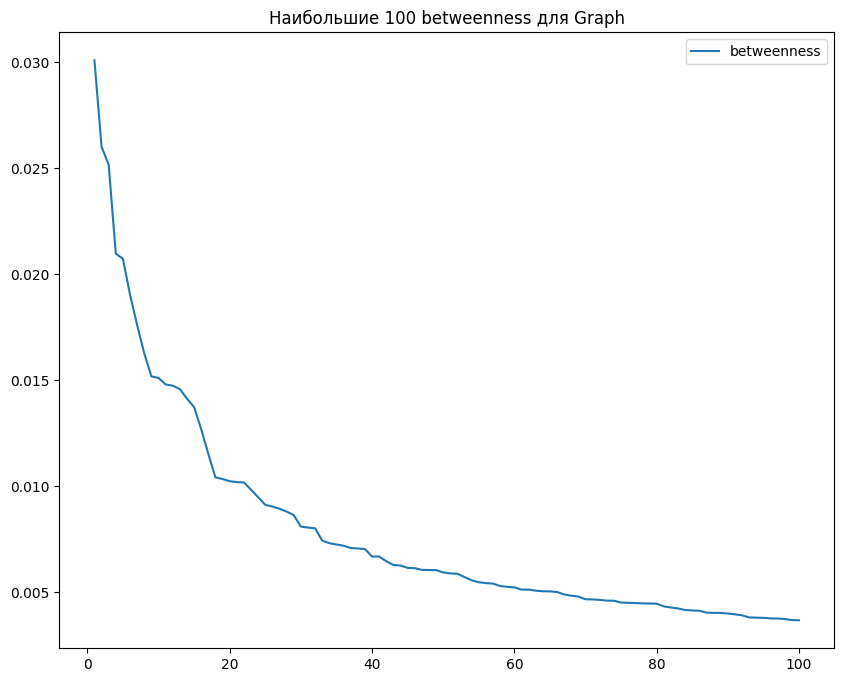

In [48]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(g_betw)[:100], label ='betweenness')

plt.legend()
plt.title('Наибольшие 100 betweenness для Graph')

plt.show()


In [20]:
g_eigs = G.EigenValues(1, 0, 2, False, 100)

Combinatorial complex


In [49]:
ranks = []
def getDiversity(x):
  return len(set(x))

for edge in labeled_edges:
  ranks.append(getDiversity(edge))
  
C = simpl.CombinatorialComplex()
C.BuildWithRank(edges, ranks)


In [50]:
for i in range(D+1):
  print(i, C.BettiNumber(i))

0 0
1 -271
2 1693
3 0
4 0
5 0


In [53]:
c_betw = C.BetweennessAll(2, 3, False)
c_betw = sorted(c_betw, key=lambda x: x[1], reverse=True)

In [54]:
c_clos = C.ClosenessAll(2, 3, False)
c_clos = sorted(c_clos, key=lambda x: x[1], reverse=True)

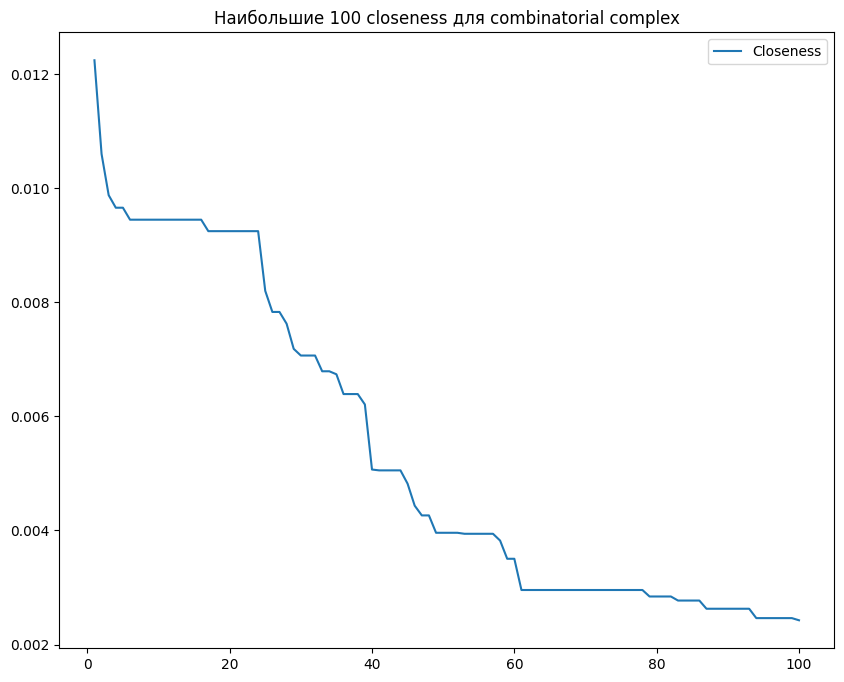

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(c_clos)[:100], label ='Closeness')

plt.legend()
plt.title('Наибольшие 100 closeness для combinatorial complex')

plt.show()


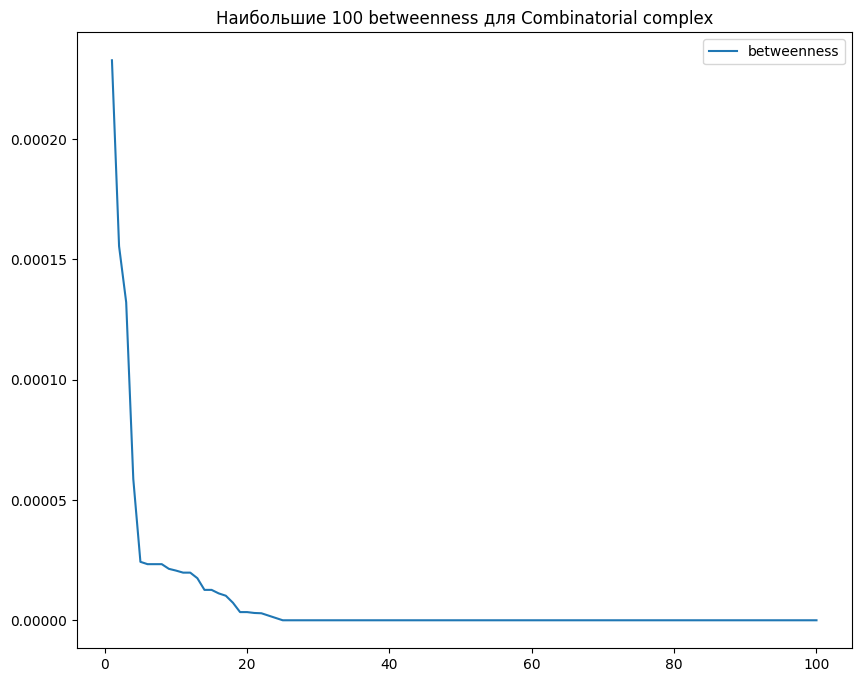

In [57]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(c_betw)[:100], label ='betweenness')

plt.legend()
plt.title('Наибольшие 100 betweenness для Combinatorial complex')

plt.show()


In [58]:
c_eigs = C.EigenValues(1, 0, 2, False, 100)

Simplicial Complex

In [59]:
S = simpl.SimplicialComplex()
for edge in edges:
  S.AddSimplex(edge)

In [60]:
for i in range(D+1):
  print(i, S.BettiNumber(i))
  

0 1
1 3510
2 157
3 0
4 0
5 0


In [61]:
s_betw = S.BetweennessAll(1, 2, False)
s_betw = sorted(s_betw, key=lambda x: x[1], reverse=True)

In [62]:
s_clos = S.ClosenessAll(1, 2, False)
s_clos = sorted(s_clos, key=lambda x: x[1], reverse=True)

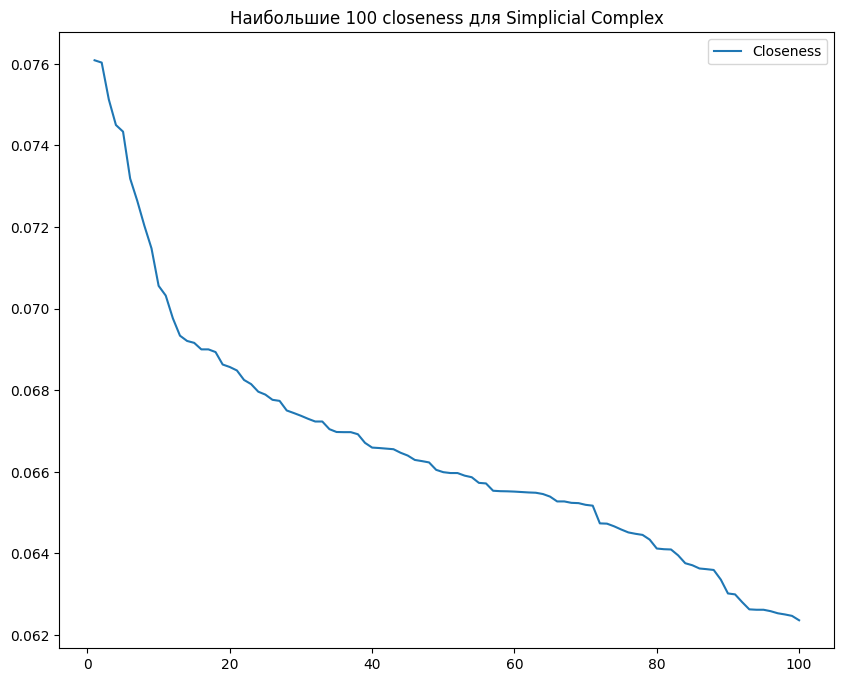

In [63]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(s_clos)[:100], label ='Closeness')

plt.legend()
plt.title('Наибольшие 100 closeness для Simplicial Complex')

plt.show()


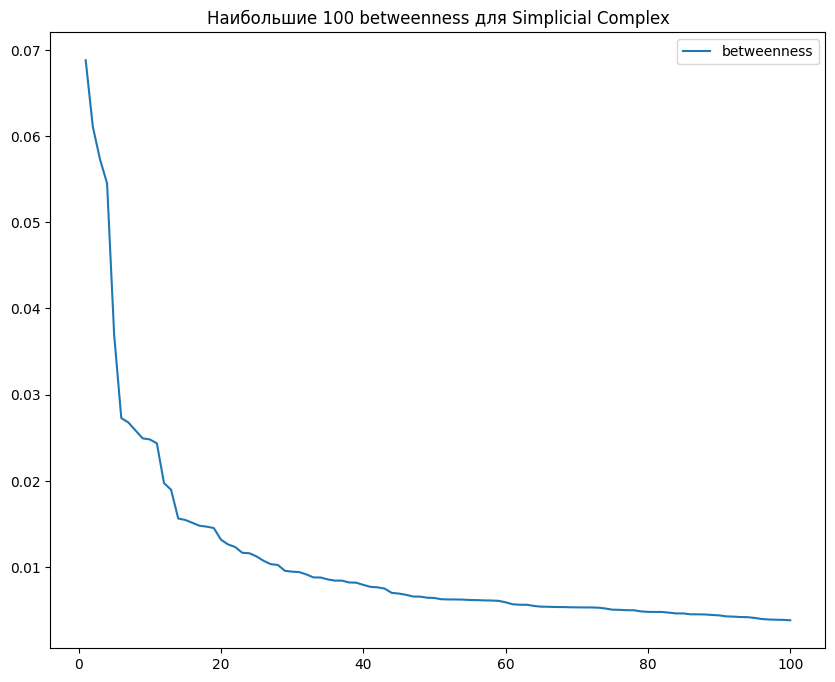

In [64]:
plt.figure(figsize=(10, 8))
plt.plot(x, getValues(s_betw)[:100], label ='betweenness')

plt.legend()
plt.title('Наибольшие 100 betweenness для Simplicial Complex')

plt.show()


In [65]:
s_eigs = S.EigenValues(1, 0, 2, False, 100)

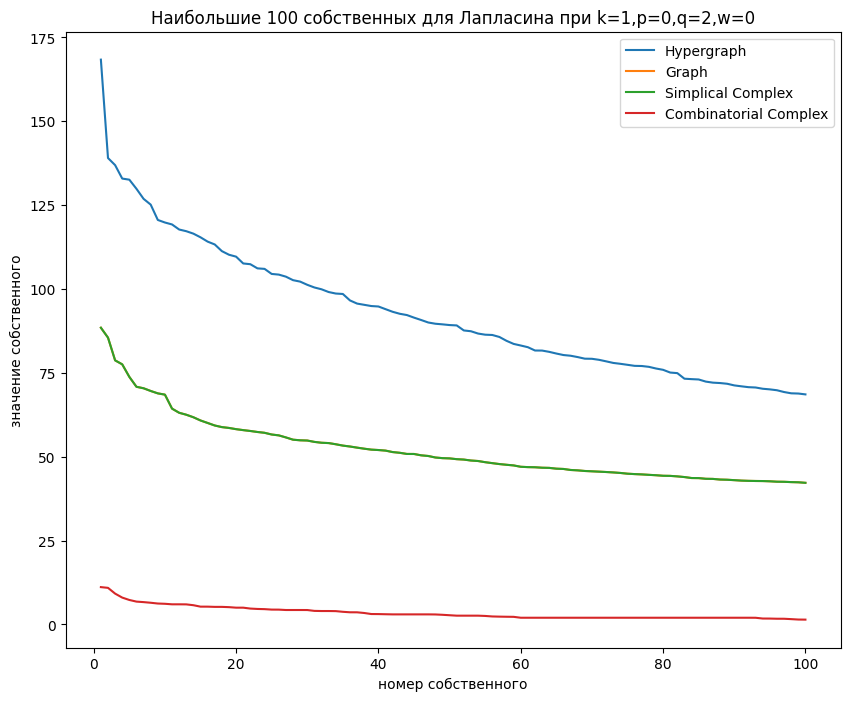

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(x, h_eigs, label ='Hypergraph')
plt.plot(x, g_eigs, label ='Graph')
plt.plot(x, s_eigs, label ='Simplical Complex')
plt.plot(x, c_eigs, label ='Combinatorial Complex')

plt.xlabel("номер собственного")
plt.ylabel("значение собственного")
plt.legend()
plt.title('Наибольшие 100 собственных для Лапласина при k=1,p=0,q=2,w=0')

plt.show()
